# NLP Notebook

In [320]:
import nltk
import pandas as pd
import numpy as np

# NLTK

## Tokenization

### Sentence

In [321]:
from nltk.tokenize import sent_tokenize

text = """Hello. How are you, dear Mr. Sir? Are you well?
          Here: drink this! It will make you feel better.
          I mean, it won't make you feel worse!"""

sentences = sent_tokenize(text)
print sentences

['Hello.', 'How are you, dear Mr. Sir?', 'Are you well?', 'Here: drink this!', 'It will make you feel better.', "I mean, it won't make you feel worse!"]


### Word

In [322]:
from nltk.tokenize import word_tokenize
word_tokenize(corpus[0])
words = word_tokenize(text)
print words

['Hello', '.', 'How', 'are', 'you', ',', 'dear', 'Mr.', 'Sir', '?', 'Are', 'you', 'well', '?', 'Here', ':', 'drink', 'this', '!', 'It', 'will', 'make', 'you', 'feel', 'better', '.', 'I', 'mean', ',', 'it', 'wo', "n't", 'make', 'you', 'feel', 'worse', '!']


## Parts of Speech Tagging

In [323]:
from nltk.tag import pos_tag
words = word_tokenize("Who's going to that thing today?")
pos_tag(words)

[('Who', 'WP'),
 ("'s", 'VBZ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('that', 'DT'),
 ('thing', 'NN'),
 ('today', 'NN'),
 ('?', '.')]

##### Some of POS tags: 
WP: wh-pronoun ("who", "what")  
VBZ: verb, 3rd person sing. present ("takes")  
VBG: verb, gerund/present participle ("taking")  
TO: to ("to go", "to him")   
DT: determiner ("the", "this")  
NN: noun, singular or mass ("door")  
.: Punctuation (".", "?")  

All tags: http://www.monlp.com/2011/11/08/part-of-speech-tags/

# Count Vectorizer

In [324]:
corpus = [
         'This is the first document.',
         'This is the second Second document.',
         'And the third one.',
         'Is this the first document?'
          ]

In [325]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<type 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [326]:
vectorizer.get_feature_names()

[u'and',
 u'document',
 u'first',
 u'is',
 u'one',
 u'second',
 u'the',
 u'third',
 u'this']

In [327]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [328]:
print(vectorizer.transform(['Is this the first document?']).toarray())
print(vectorizer.transform(['This is the first document']).toarray())

[[0 1 1 1 0 0 1 0 1]]
[[0 1 1 1 0 0 1 0 1]]


# Bi-Grams

In [329]:
bigram_vectorizer = CountVectorizer(stop_words= 'english', ngram_range=(2,2),min_df=1)
bigram_vectorizer.fit_transform(corpus).toarray()

array([[0, 0],
       [1, 1],
       [0, 0],
       [0, 0]])

In [330]:
bigram_vectorizer.get_feature_names()

[u'second document', u'second second']

# TF IDF

In [331]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus).toarray()

array([[ 0.        ,  0.43877674,  0.54197657,  0.43877674,  0.        ,
         0.        ,  0.35872874,  0.        ,  0.43877674],
       [ 0.        ,  0.27230147,  0.        ,  0.27230147,  0.        ,
         0.85322574,  0.22262429,  0.        ,  0.27230147],
       [ 0.55280532,  0.        ,  0.        ,  0.        ,  0.55280532,
         0.        ,  0.28847675,  0.55280532,  0.        ],
       [ 0.        ,  0.43877674,  0.54197657,  0.43877674,  0.        ,
         0.        ,  0.35872874,  0.        ,  0.43877674]])

# Stemming

In [333]:
stemmer = nltk.stem.porter.PorterStemmer()
print stemmer.stem('running')

run


# Distance

In [352]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

text = ['hi mike', 'hi hi mike mike']

X = vectorizer.fit_transform(text)

In [353]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import paired_euclidean_distances

print cosine_distances(X[0], X[1])
print paired_euclidean_distances(X[0], X[1])

[[  2.22044605e-16]]
[ 1.41421356]


In [354]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

text = ['hi mike', 'hi hi hi mike mike mike']

X = vectorizer.fit_transform(text)

print cosine_distances(X[0], X[1])
print paired_euclidean_distances(X[0], X[1])

[[ 0.]]
[ 2.82842712]


# Pair Programming

In [383]:
from nltk.corpus import names
import random
names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

In [384]:
df = pd.read_csv('/Users/mike/Documents/Datasets/names.csv')

In [385]:
df = df.sample(frac=1)

In [386]:
mask = (df['year'] >= 1940) & (df['year'] <= 1990)

In [387]:
names = list(set(zip(map(lambda x: x.lower(),df[mask]['names']), df[mask]['sex'])))

In [388]:
X, y = np.array(names)[:,0] , np.array(names)[:,1]

In [394]:
pd.Series(y_train).value_counts()

F    26195
M    14539
dtype: int64

In [395]:
pd.Series(y_test).value_counts()

F    8643
M    4935
dtype: int64

In [389]:
def name_length(name):
    return len(name)

def end_letters(name, num = 1):
    return name[-num:]

def first_letters(name, num = 1):
    return name[:num]

def get_df(data):
    df = pd.DataFrame({'length': map(name_length,data),
    'first_letter': map(first_letters,data),
    'end_letter': map(end_letters,data),
    'first_two_letter': map(lambda x: first_letters(x,2),data),
    'end_two_letter': map(lambda x: end_letters(x,2),data)})
    
    return df

def get_feats(data):
    return pd.get_dummies(data, columns = ['end_letter', 'end_two_letter', 'first_letter', 'first_two_letter'], prefix = ['e1','e2','f1','f2'])

In [392]:
X = map(lambda x: x.lower(), X)

df = get_df(X)
df = get_feats(df)

In [393]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y)

In [396]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
clf = RandomForestClassifier()

params = {'max_depth':[25,50], 'n_estimators': [500]}

grid = GridSearchCV(estimator=clf, param_grid=params, cv=3)
grid = grid.fit(X_train, y_train)

In [397]:
print grid.best_estimator_
print grid.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.777188589385


In [398]:
importances = grid.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{} feature {} ({})".format(f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1 feature e1_a (0.223556380829)
2 feature length (0.0720565169912)
3 feature e1_o (0.0392225303145)
4 feature e1_s (0.0349972716038)
5 feature e2_on (0.03430978407)
6 feature e1_n (0.029920604106)
7 feature e2_ia (0.0291995442838)
8 feature e1_d (0.0287237310301)
9 feature e2_na (0.0274936760962)
10 feature e1_e (0.0230535242114)
11 feature e1_r (0.0170097755372)
12 feature e1_l (0.0155715288782)
13 feature e1_k (0.0143721205531)
14 feature e2_ha (0.0141713083894)
15 feature e2_us (0.0135117162148)
16 feature e2_ta (0.0108220855832)
17 feature e2_da (0.0101024986957)
18 feature e2_io (0.00987249613906)
19 feature e2_an (0.00978937301421)
20 feature e2_nn (0.0093913867356)
21 feature e1_m (0.00915813083797)
22 feature f2_sh (0.008794937525)
23 feature e2_ne (0.00826242057651)
24 feature e2_rd (0.00789022413687)
25 feature e2_ra (0.00765165111639)
26 feature e2_la (0.00697500462289)
27 feature e2_ck (0.00683177979135)
28 feature e2_yn (0.00641695023023)
29 feature e2_er 

<Container object of 100 artists>

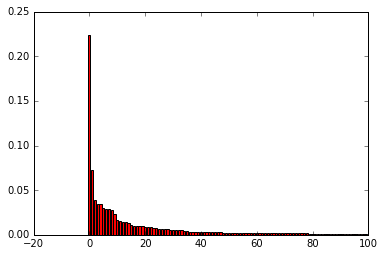

In [399]:
import matplotlib.pyplot as plt
plt.bar(range(100), importances[indices][:100],
       color="r",align="center")

In [311]:
print X_train[y_train == 'M']['e1_a'].sum()/sum(y_train == 'M')
print X_train[y_train == 'F']['e1_a'].sum()/sum(y_train == 'F')

0.057821267278
0.465658499234


In [312]:
print X_train[y_train == 'M']['e1_o'].sum()/sum(y_train == 'M')
print X_train[y_train == 'F']['e1_o'].sum()/sum(y_train == 'F')

0.0720541946079
0.00991577335375


In [313]:
print X_train[y_train == 'M']['e1_s'].sum()/sum(y_train == 'M')
print X_train[y_train == 'F']['e1_s'].sum()/sum(y_train == 'F')

0.0805392089777
0.0168070444104


In [314]:
print X_train[y_train == 'M']['e2_on'].sum()/sum(y_train == 'M')
print X_train[y_train == 'F']['e2_on'].sum()/sum(y_train == 'F')

0.0720541946079
0.0126339969372


In [315]:
print X_train[y_train == 'M']['e2_na'].sum()/sum(y_train == 'M')
print X_train[y_train == 'F']['e2_na'].sum()/sum(y_train == 'F')

0.0076638839469
0.0812404287902


In [316]:
print X_train[y_train == 'M']['e1_d'].sum()/sum(y_train == 'M')
print X_train[y_train == 'F']['e1_d'].sum()/sum(y_train == 'F')

0.0480361297386
0.0051684532925


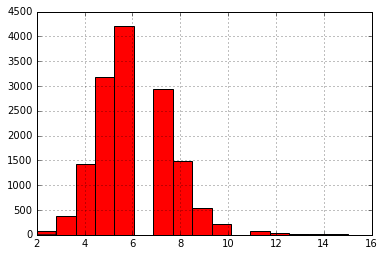

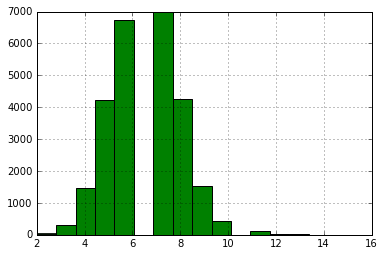

In [317]:
%matplotlib inline
X_train[y_train == 'M']['length'].hist(color='red', bins = 16)
plt.figure()
X_train[y_train == 'F']['length'].hist(color='green', bins = 16)

In [318]:
pred = grid.best_estimator_.predict(X_test)

In [319]:
1.0*sum(pred == y_test)/len(y_test)

0.7798644866696126